In [31]:
#importing the libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [32]:
driver = webdriver.Chrome('C:/Users/mc277/Downloads/chromedriver.exe')

In [33]:
driver.get('https://www.instagram.com/accounts/login/')

In [34]:
suname = 'SAMPLE USERNAME'  # replacing the username with sample username
spwd = 'SAMPLE PASSWORD'    # replacing the password with sample password
uname = driver.find_element_by_name('username')
pwd = driver.find_element_by_name('password')
uname.send_keys(suname)
pwd.send_keys(spwd+Keys.ENTER)
wait = WebDriverWait(driver,10)
driver.maximize_window()

In [5]:
dont_save_details = driver.find_element_by_class_name('sqdOP')
dont_save_details.click()

In [6]:
not_now = driver.find_element_by_class_name('aOOlW')
not_now.click()

In [7]:
# Search in the search box
def searchtxt(txt):
    search = driver.find_element_by_class_name('XTCLo')
    # clear the search bar and type food and press enter
    search.clear()
    search.send_keys(txt+Keys.ENTER)
    wait = WebDriverWait(driver,10)
    elts = wait.until(EC.presence_of_all_elements_located((By.XPATH,'//div[@class = "fuqBx"]//span[@class = "Ap253"]')))
    return elts

In [8]:
# method to open the post and find the posts created in last 3 days
current_date = datetime.datetime.utcnow()
def findPost():
    c=0
    while(True):
        flag=0
        posts = wait.until(EC.visibility_of_all_elements_located((By.XPATH,'//div[@class ="_9AhH0"]')))
        for post in posts[c:]:
            post.click()
            date = wait.until(EC.presence_of_element_located((By.XPATH,'//time')))
            raw_date = date.get_attribute('datetime').strip()[:-1]
            post_date = datetime.datetime.strptime(raw_date, '%Y-%m-%dT%H:%M:%S.%f')
            dat_dif = current_date - post_date
            close = driver.find_elements_by_class_name('_8-yf5')[-1]
            close.click()
            if(dat_dif.days<=3):
                c+=1
            else:
                flag=1
                break
        if(flag==1):
            break
        sleep(3)
    return c

In [9]:
# Names of the instagram handles after typing food
elts = searchtxt('food')
handles = []
c=0
for elt in elts:
    handle = elt.get_attribute('innerHTML')
    if '#' not in handle:
        handles.append(handle)
        c+=1
    if(c==10):
        break

n_followers={}
for handle in handles:
    driver.get('https://www.instagram.com/'+handle)
    fol_list = wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers')))
    n_fol = fol_list.find_element_by_tag_name('span').get_attribute('title')
    n_followers[handle]=int(n_fol.strip().replace(',',''))

1.1) From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [10]:
sorted_fol = sorted(n_followers.items(), key = lambda x: -x[1])
handle_list = []
fol_list = []
print('Top 5 instagram handles found when searched food with highest number of followers:')
for i in sorted_fol[:5]:
    handle_list.append(i[0])
    fol_list.append(i[1])
    print(i[0],i[1])

Top 5 instagram handles found when searched food with highest number of followers:
foodnetwork 10900945
yourfoodlab 1508956
foodie_incarnate 238880
vismaifoodies 140498
food 100694


1.2) Now Find the number of posts these handles have done in the previous 3 days.

In [11]:
print('Number of posts made by top 5 handles in last 3 days:')
n_post_list = []
for i in range(5):
    driver.get('https://www.instagram.com/'+handle_list[i])
    n_post = findPost()
    n_post_list.append(n_post)
    print(handle_list[i],n_post_list[i])

Number of posts made by top 5 handles in last 3 days:
foodnetwork 37
yourfoodlab 4
foodie_incarnate 9
vismaifoodies 2
food 7


1.3) Depict this information using a suitable graph.

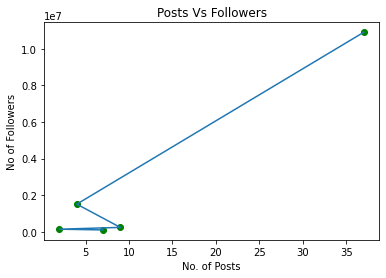

In [12]:
# Graph of how number of followers are influenced by number of posts
plt.plot(n_post_list,fol_list)
plt.scatter(n_post_list,fol_list,c='g')
plt.xlabel('No. of Posts')
plt.ylabel('No of Followers')
plt.title('Posts Vs Followers')
plt.show()

2.1) Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

2.2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [13]:
word_dict = {}

def filter_emojis(sentence):
        return [word for word in sentence.split() if str(word.encode('unicode-escape'))[2] != '\\' ]

def findWords():
    elts = wait.until(EC.visibility_of_all_elements_located((By.XPATH,'//div[@class = "C4VMK"]/span')))
    for elt in elts:
        decode = elt.text
        word_list = filter_emojis(decode)
        for word in word_list:
            word_dict[word] = word_dict.get(word,0)+1
            
def find_words_post():
    posts = wait.until(EC.visibility_of_all_elements_located((By.XPATH,'//div[@class ="_9AhH0"]')))
    for post in posts[:10]:
        post.click()
        findWords()
        close = driver.find_elements_by_class_name('_8-yf5')[-1]
        close.click()

In [20]:
for i in range(5):
    driver.get('https://www.instagram.com/'+handle_list[i])
    find_words_post()
word_dict = sorted(word_dict.items(), key = lambda x: -x[1])
word_dict1 = {'Word':[],'Frequency':[]}
for key,val in word_dict:
    word_dict1['Word'].append(key)
    word_dict1['Frequency'].append(val)

2.3) Create a csv file with two columns : the word and its frequency

In [21]:
# creating a dataframe from dictionary
df = pd.DataFrame.from_dict(word_dict1)
# converting dataframe to csv
df.to_csv('word_freq.csv',index = False)

2.4) Now, find the hashtags that were most popular among these bloggers

In [22]:
print('Top 5 most popular hashtags were:')
hashtags = []
hashtag_freq = []
for key in word_dict:
    if('#' in key[0]):
        hashtags.append(key[0])
        hashtag_freq.append(key[1])
        print(key[0],key[1])
    if(len(hashtags)==5):
        break

Top 5 most popular hashtags were:
#food 18
#foodie 16
#foodporn 15
#foodiesofinstagram 11
#streetfood 10


2.5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

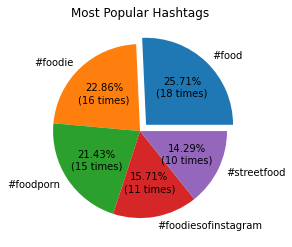

In [23]:
def func(pct, allvals):
    absolute = int(round(pct*sum(allvals)/100.))
    return "{:.2f}%\n({:d} times)".format(pct, absolute)

explode = [0.1, 0, 0, 0, 0]
plt.pie(hashtag_freq,labels = hashtags, 
        autopct = lambda pct: func(pct,hashtag_freq) ,explode = explode)
plt.title('Most Popular Hashtags')
plt.show()

3.1) Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [25]:
# find likes of top 10 posts
likes_dict = {}
def find_likes(handle):
    posts = wait.until(EC.visibility_of_all_elements_located((By.XPATH,'//div[@class ="_9AhH0"]')))
    for post in posts[:10]:
        post.click()
        try:
            wait.until(EC.visibility_of_element_located((By.CLASS_NAME,'EDfFK')))
            elt = driver.find_element_by_class_name('Nm9Fw')
            like_count = int(elt.text.replace('likes','').strip().replace(',',''))
            likes_dict[handle].append(like_count)
        except:
            elt = driver.find_element_by_class_name('vcOH2')
            elt.click()
            like = driver.find_element_by_xpath('//div[@class = "vJRqr"]/span')
            like_count = int(like.text.replace(',',''))
            likes_dict[handle].append(like_count)
            driver.find_element_by_class_name('_2dDPU').click()
        close = driver.find_elements_by_class_name('_8-yf5')[-1]
        close.click()

In [26]:
for i in range(5):
    likes_dict[handle_list[i]]=[]
    driver.get('https://www.instagram.com/'+handle_list[i])
    find_likes(handle_list[i])

3.2) Calculate the average likes for a handle.

In [27]:
avg_likes_list = []
print('Average Likes for top 5 handles:')
for i in range(5):
    handle = handle_list[i]
    total_likes = sum(likes_dict[handle])
    avg_likes = total_likes//10
    avg_likes_list.append(avg_likes)
    print(handle,avg_likes)

Average Likes for top 5 handles:
foodnetwork 9753
yourfoodlab 32697
foodie_incarnate 4102
vismaifoodies 3606
food 688


3.3) Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [28]:
print('Followers:Likes ratio of top 5 food handles:')
follower_likes_ratio = []
for i in range(5):
    handle = handle_list[i]
    n_follower = fol_list[i]
    avg_likes = avg_likes_list[i]
    ratio = n_follower//avg_likes
    follower_likes_ratio.append(ratio)
    print(handle,ratio)

Followers:Likes ratio of top 5 food handles:
foodnetwork 1117
yourfoodlab 46
foodie_incarnate 58
vismaifoodies 38
food 146


3.4) Create a bar graph to depict the above obtained information.

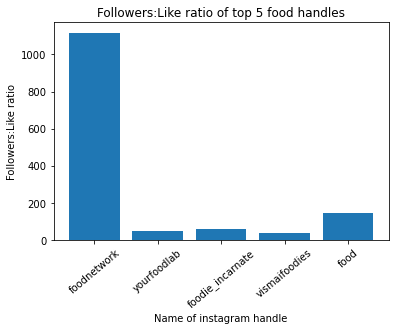

In [29]:
# bar graph to depict followers to like ratio
plt.bar(handle_list,follower_likes_ratio)
plt.xlabel('Name of instagram handle')
plt.ylabel('Followers:Like ratio')
plt.title('Followers:Like ratio of top 5 food handles')
plt.xticks(rotation=40)
plt.show()